In [1]:
## import modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table

## plot style
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.serif'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'

mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', ['0072B2', '009E73', 'D55E00', 'CC79A7', 'F0E442', '56B4E9'])
color_cycle = mpl.rcParams['axes.prop_cycle'].by_key()['color']

mpl.rcParams['figure.figsize'] = 8,7
mpl.rcParams['figure.titlesize'] = 32

mpl.rcParams['axes.titlesize'] = 28
mpl.rcParams['axes.labelsize'] = 26

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20

mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.bottom'] = True
mpl.rcParams['ytick.left'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 6

mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['ytick.minor.size'] = 3

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

mpl.rcParams['legend.fontsize'] = 18
mpl.rcParams['legend.facecolor'] = 'lightgrey'

mpl.rcParams['lines.linewidth'] = 2.275

In [2]:
def pass_assef18(w1, w2, ar=0.65, br=0.153, gr=13.86):
    '''
    checks for A18 R90 pass
    w1: WISE band 1 magnitude (Vega)
    w2: WISE band 2 magnitude (Vega)
    ar, br, gr: alpha, beta, gamma from Assef+18 - values depend on required reliability - default is R90
    return: pass_flag (boolean pass/fail)
    '''
    pass_flag = False
    if w1!='null' and w2!='null': # double check for input in string format
        w1 = float(w1)
        w2 = float(w2)
        if w2<=gr and w1-w2>ar: # bright sources
            pass_flag = True
        elif w2>gr and w1-w2>ar*np.exp(br*((w2-gr)**2)): # dim sources
            pass_flag = True
    return pass_flag

In [3]:
## import table containing matched targets and unWISE data
## change relative data location if necessary

data_folder = '../../data/'
wisecheck_fname = f'{data_folder}LSDR10_targets_26Aug22_Mateos_unwise_matches.fits'
t_data = Table.read(wisecheck_fname)

In [4]:
## check selection colour for each unWISE source

pass_A18_R90_unwise = [pass_assef18(w1mag, w2mag) for w1mag, w2mag in zip(t_data['magV_1_unwise'], t_data['magV_2_unwise'])]

print(f'Original number of targets: {len(t_data)}')
print(f'Number of passes: {sum(pass_A18_R90_unwise)}')

Original number of targets: 561189
Number of passes: 223442


In [5]:
## add pass flag to table and save

t_data['pass_A18_R90'] = pass_A18_R90_unwise
# t_data.write(wisecheck_fname, overwrite=True)

In [6]:
## pass line for plot

ar,br,gr = 0.65,0.153,13.86

x_A90 = np.arange(5, 25.1, 0.1)
y_A90 = np.array([ar if x<gr else ar*np.exp(br*((x-gr)**2)) for x in x_A90])

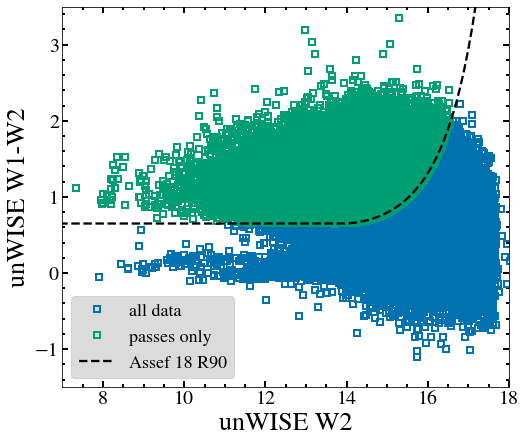

In [7]:
## plot

fig = plt.figure()

ax1 = plt.subplot(1, 1, 1)

# all data
ax1.plot(t_data['magV_2_unwise'], t_data['magV_1_unwise']-t_data['magV_2_unwise'], 's', fillstyle='none', mew=2, label='all data')

# passes only
ax1.plot(t_data['magV_2_unwise'][pass_A18_R90_unwise], t_data['magV_1_unwise'][pass_A18_R90_unwise]-t_data['magV_2_unwise'][pass_A18_R90_unwise], 's', fillstyle='none', mew=2, label='passes only')

# A18 R90 threshold
ax1.plot(x_A90, y_A90, '--k', label='Assef 18 R90')

# plot finishing
ax1.legend()

ax1.set_xlim([7, 18,])
ax1.set_ylim([-1.5, 3.5])

ax1.set_xlabel('unWISE W2')
ax1.set_ylabel('unWISE W1-W2')

plt.show()